# Definition of the logistic sequence:

Let $(u_n)$ be the logistic sequence defined by the following recursive fomula:
$$
u_{n+1} = r\ u_n(1-u_n),\
$$
where the initial condition is $u_0 = 0.1$, and where the rate varies in the interval $1.2<r\leq 4$.



In order to calculate the terms of the sequence, we can define a function of the paramters $r$ (rate), $u_0$ (initial term), and the number of iterations $N$:

In [ ]:
def logistic(r,N,u0):  # function
  u=u0 # initial term
  L=[] # we create a list of elements
  for k in range(N): # for loop
    L.append(u)  # we add an element to the list at each interation
    u=r*u*(1-u) # we define the subsequent element of u using the recursive formula
  return L # we return the list L


Now, we can display the list of the first 10 elements (starting from n=0), for $r=1.2$ and $u_0=0.1$:

In [ ]:
logistic(1.2,10,0.1)

[0.1,
 0.108,
 0.11560319999999999,
 0.12268692017971199,
 0.12916180775583477,
 0.13497484220769546,
 0.14010796101444378,
 0.14457326432978265,
 0.14840620268497612,
 0.15165816202752228]

**Question 1:** show the first 20 terms of the sequence for $r=3.2$ and $u_0=0.2$ (modify the parameters in the function). What do you observe?

**Question 2:** show the first 15 terms of the sequence for $r=4$ and $u_0=0.15$. What do you observe?

In [ ]:
logistic(3.2,20,0.2)

[0.2,
 0.5120000000000001,
 0.7995392,
 0.512884056522752,
 0.7994688034800593,
 0.5130189943751092,
 0.7994576185134749,
 0.5130404310855622,
 0.7994558309027286,
 0.5130438570827405,
 0.7994555449356961,
 0.5130444051432489,
 0.7994554991822682,
 0.5130444928303954,
 0.7994554918617529,
 0.5130445068602741,
 0.7994554906904713,
 0.5130445091050531,
 0.7994554905030663,
 0.5130445094642175]

In [ ]:
logistic(4,15,0.15)

[0.15,
 0.51,
 0.9996,
 0.001599359999999824,
 0.006387208190360898,
 0.02538564704757554,
 0.09896486388620584,
 0.3566832784087624,
 0.9178412692493588,
 0.30163469484833927,
 0.842604822848354,
 0.5304877414441919,
 0.9962819904865284,
 0.0148167436749172,
 0.058388831127156]

# Graphing the logistic sequence

Now, we can graph the sequence as a function of $n$, that is $u_n = f(n)$, for $r=1.1$ and $r=1.5:

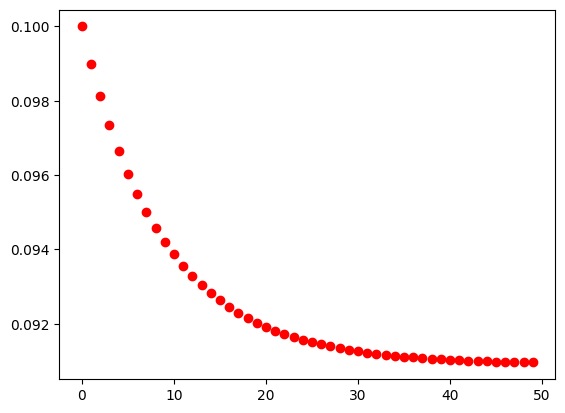

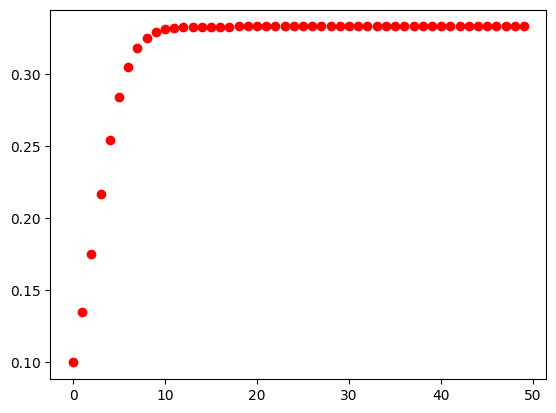

In [ ]:
from matplotlib import pyplot as plt  # matplotlib is a plotting library to make graphs.

plt.figure() # This creates an environment to display the graph
plt.plot(logistic(1.1,50,0.1),'ro') # We plot the graph corresponding to the list

plt.figure() # This creates a new environment to display the graph
plt.plot(logistic(1.5,50,0.1),'ro')



**Question 1:** On three different graphs, display the graph of the first 50 terms of the sequence for $r=1.5$, $r=3.2$, $r=3.5$ and $u_0=0.1$. What do you observe for each graph?

**Question 2:** Display the graph of the first 100 terms of the sequence for $r=3.58$ and $u_0=0.1$. What do you observe?

**Question 4:** Display the graph of the first 1000 terms of the sequence for $r=4$ and $u_0=0.1$. What do you observe?

**Question 5:** Following your observations, formulate a general conclusion of the behavior of this sequence as a function fo the parameter $r$.  

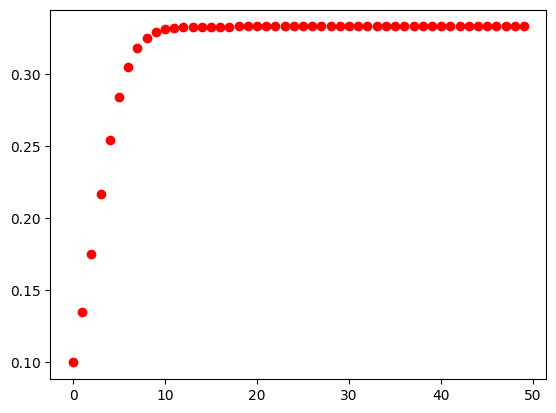

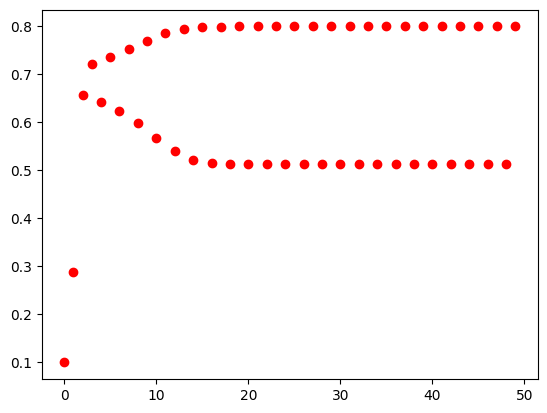

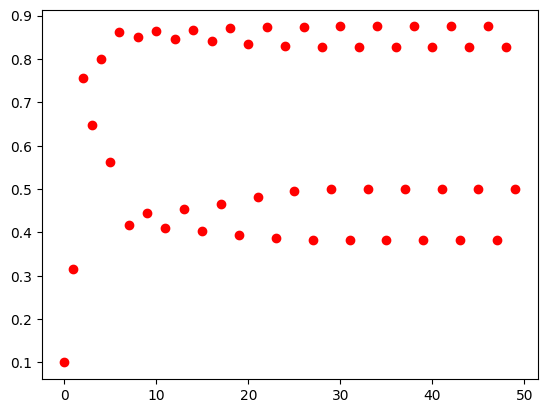

In [ ]:
from matplotlib import pyplot as plt  # matplotlib is a plotting library to make graphs.

plt.figure() # This creates an environment to display the graph
plt.plot(logistic(1.5,50,0.1),'ro') # We plot the graph corresponding to the list

plt.figure() # This creates a new environment to display the graph
plt.plot(logistic(3.2,50,0.1),'ro')

plt.figure() # This creates a new environment to display the graph
plt.plot(logistic(3.5,50,0.1),'ro')

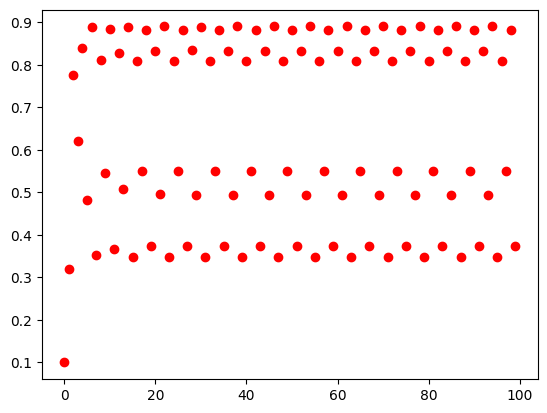

In [ ]:
plt.figure() # This creates a new environment to display the graph
plt.plot(logistic(3.56,100,0.1),'ro')

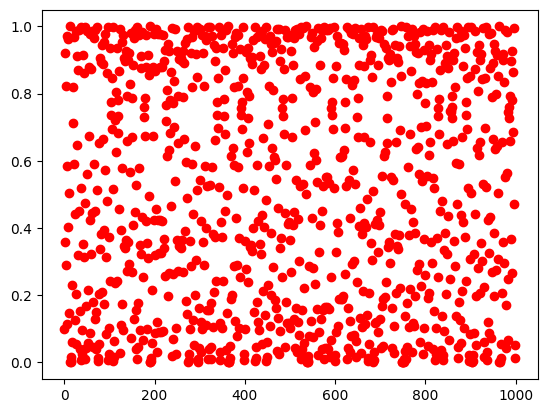

In [ ]:
plt.figure() # This creates a new environment to display the graph
plt.plot(logistic(4,1000,0.1),'ro')

# Logistic Map

Now, we want to look at the map $y=L(r)$ that gives the limits of the sequences $(u_n)$ as a function of the parameter $r$.



## Finding the limits

As you see from above, there could be more than one limits for the logisitic sequence depending on the value of r. We will attempt to find a numerical estimate of these limits.

To find the limits of the sequences, we use an algorithm. We define a criterion to find the limit:
* First, we create a list with the list of term in the sequence for large values of $n$ (greater than a given $M$).
* Then the first value in this list is a limit. We record this limit in a list
*  If two subsequent values are close to each other (less than $10^{-n}$, where $n$ is a given value), then we consider that the limit is unchanged. Othwerise, we record the new limit in the list

In [ ]:
def lim_logistic(r,N,M,n,u0): # We define a function which estimates the limit of the logistic sequence
  L=logistic(r,N,u0) # We set a list containing the terms of the logistic sequence
  m=N-M  # We start counting at M, and thus, the number of terms to explore are eual to m=N-M
  L=L[-m:] # We create a new list L with the last m terms of logistic(r,N,u0)
  L.sort() # We sort the terms of this new list L
  L_lim=[L[0]] # We create a list to report the estimate of the limit
  for k in range(m-1):  # We scan all the terms in the list L
    if round(L[k+1],n)!=round(L[k],n): # We set a condition: of the two subsequent terms of the list are roughly equal to each other (at the order 10^{-n})), then we say this is the limit at this order
      L_lim.append(L[k+1])
  return L_lim # We return the list with the values found in the loop

Now, we can find the limit of the sequence when $r=1.2$ and $u_0=0.1$. We take $N=100$ terms in the list and look at the last 50 terms (M=50).

In [ ]:
lim_logistic(1.2,100,50,2,0.1)

[0.16666487116422993]

**Question 1:** Find the limits of the logistic sequence for $r=1.5,\ r=3.2,\ r=3.5$. How many limits to you have for each case?

**Question 2:** Can you write a code to find the number of limits?

In [ ]:
lim_logistic(1.2,100,50,2,0.1), lim_logistic(3.2,100,50,2,0.1), lim_logistic(3.5,100,50,2,0.1)

([0.16666487116422993],
 [0.5130445095326298, 0.7994554904673701],
 [0.38281968301731983,
  0.5008842103069591,
  0.8269407065914351,
  0.8749972636024116])

In [ ]:
L=lim_logistic(3.2,100,50,2,0.1)
LimNumber = len(L)
print(LimNumber)

2


## Logistic map

To graph the logistic map, we have to iterate the process describe above for all the values of $r$ in the interval $[1.2,4]$ with a given step $h$: $r_0=1.2,\ r_1=1.2+h,\ r_2=r_1+h,\cdots , r_{N_{step}}=4$, where $N_{step}$ is the total number of steps we want. We also create a list of values of $r$ and repeat the values if there are more than one possible limits for the given value of $r$.

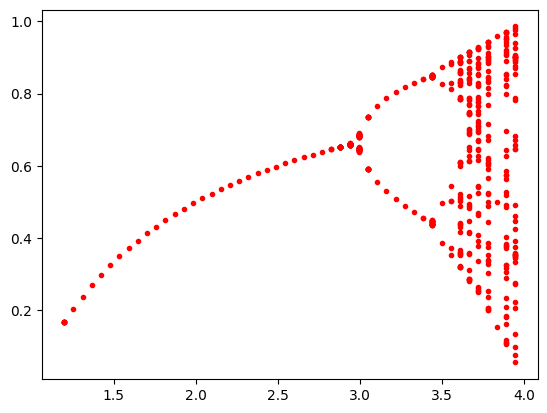

In [ ]:
L=[]
Lr=[]
Nstep=50
r=1.2
rf=4
h=(rf-r)/Nstep
for k in range(Nstep):
  Liste = lim_logistic(r,100,50,5,0.01)
  length = len(Liste)
  L.extend(Liste)
  for i in range(length):
    Lr.append(r)
  r=r+h
plt.plot(Lr,L,'r.')

We could also graph the number of limit vs. r

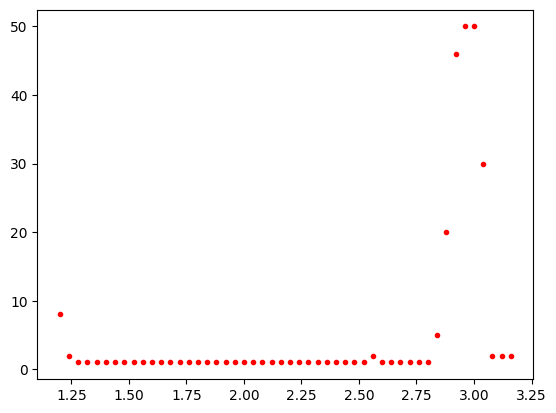

In [ ]:
L=[]
Lr=[]
LNumber=[]
Nstep=50
r=1.2
rf=3.2
h=(rf-r)/Nstep
for k in range(Nstep):
  Liste = lim_logistic(r,100,50,5,0.01)
  Lr.append(r)
  length = len(Liste)
  LNumber.append(length)
  r=r+h
plt.plot(Lr,LNumber,'r.')

**Question 1:** Modify the program above to increase the number of steps to $100$. What do you observe?

**Question 2:** Rewrite the program and modify it to scan from $r=3$ to $r=4$ with a number of steps equal to 200. What do you observe?

**Question 3:** Same question as above, for $r=3.4$ to $r=4$ with a number of steps equal to 200. What do you observe?

**Question 4:** Same question as above, for $r=3.82$ to $r=3.86$ with a number of steps equal to 200. What do you observe?

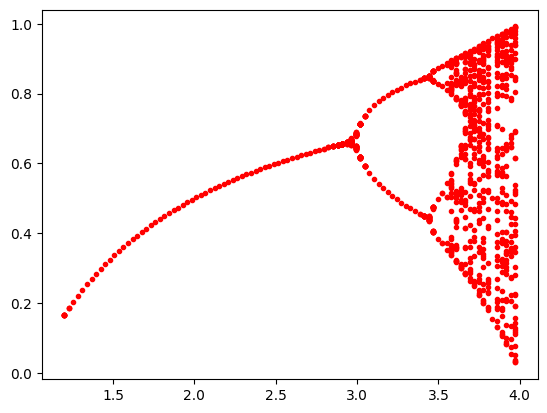

In [ ]:
L=[]
Lr=[]
Nstep=100
r=1.2
rf=4
h=(rf-r)/Nstep
for k in range(Nstep):
  Liste = lim_logistic(r,100,50,5,0.01)
  length = len(Liste)
  L.extend(Liste)
  for i in range(length):
    Lr.append(r)
  r=r+h
plt.plot(Lr,L,'r.')

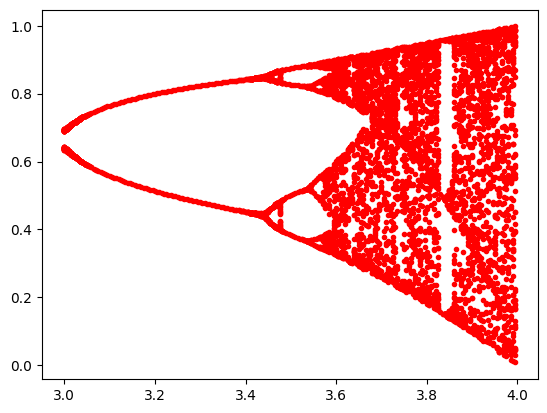

In [ ]:
L=[]
Lr=[]
Nstep=200
r=3
rf=4
h=(rf-r)/Nstep
for k in range(Nstep):
  Liste = lim_logistic(r,100,50,5,0.01)
  length = len(Liste)
  L.extend(Liste)
  for i in range(length):
    Lr.append(r)
  r=r+h
plt.plot(Lr,L,'r.')

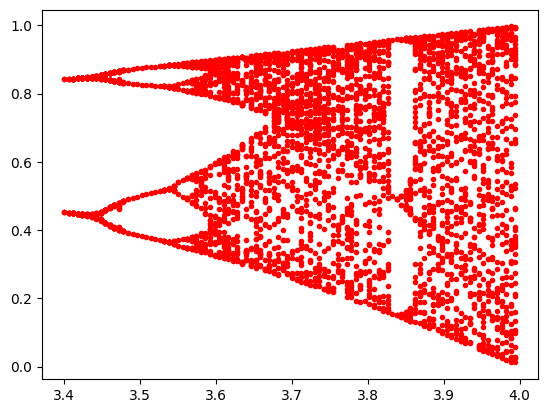

In [ ]:
L=[]
Lr=[]
Nstep=100
r=3.4
rf=4
h=(rf-r)/Nstep
for k in range(Nstep):
  Liste = lim_logistic(r,100,50,5,0.01)
  length = len(Liste)
  L.extend(Liste)
  for i in range(length):
    Lr.append(r)
  r=r+h
plt.plot(Lr,L,'r.')

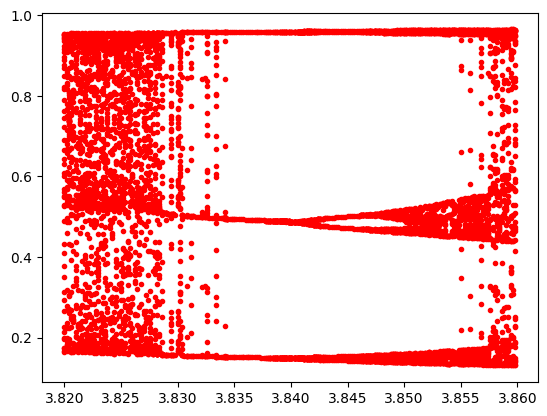

In [ ]:
L=[]
Lr=[]
Nstep=200
r=3.82
rf=3.86
h=(rf-r)/Nstep
for k in range(Nstep):
  Liste = lim_logistic(r,100,50,5,0.001)
  length = len(Liste)
  L.extend(Liste)
  for i in range(length):
    Lr.append(r)
  r=r+h
plt.plot(Lr,L,'r.')